In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Finals/bank.csv"

/content/drive/MyDrive/Finals/bank-full.csv


In [1]:
import pandas as pd

# Reading the data
df = pd.read_csv('bank.csv', delimiter=';')

# Get the summary statistics for numeric columns
description = df.describe()

# Print the description
print(description)

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

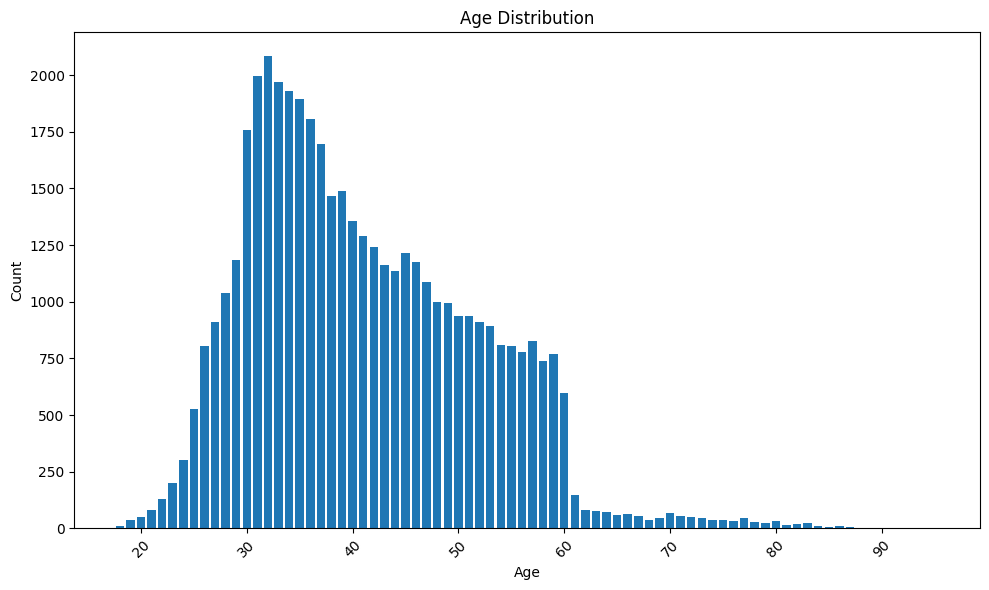

In [2]:
import matplotlib.pyplot as plt

# Count the occurrences of each age value
age_counts = df['age'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

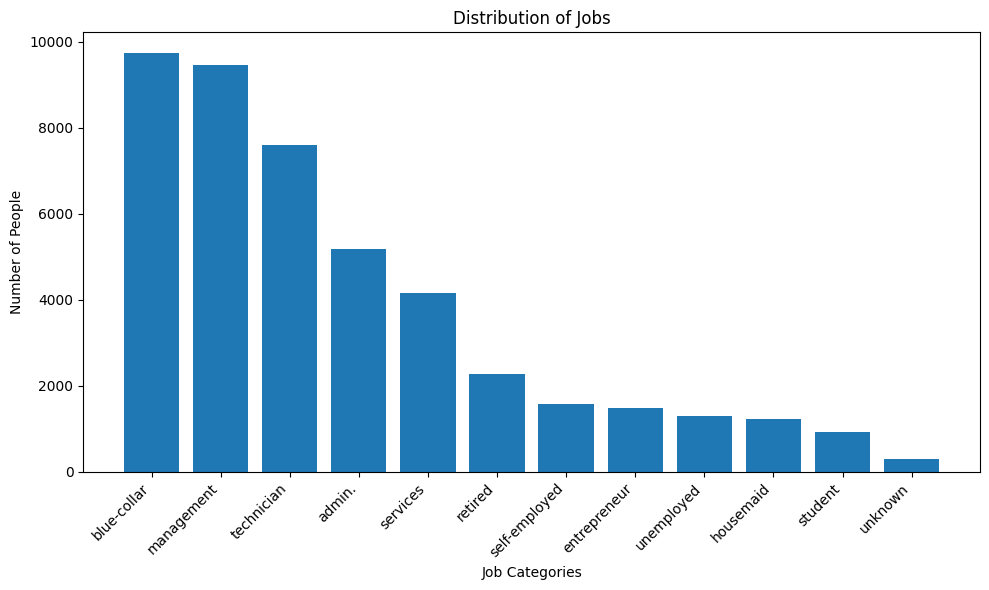

In [3]:
# Count the occurrences of each job category
job_counts = df['job'].value_counts()

# Get the job categories and their corresponding counts
job_categories = job_counts.index
job_values = job_counts.values

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(job_categories, job_values)

# Set the x-axis label and rotate the labels for better readability
plt.xlabel('Job Categories')
plt.xticks(rotation=45, ha='right')

# Set the y-axis label
plt.ylabel('Number of People')

# Set the chart title
plt.title('Distribution of Jobs')

# Display the chart
plt.tight_layout()
plt.show()

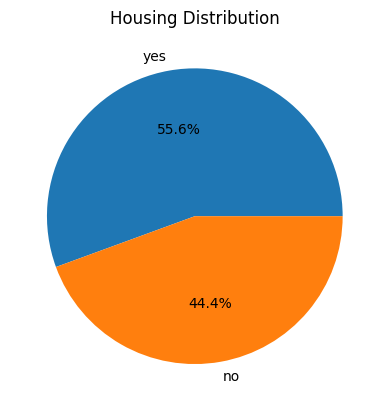

In [4]:
# Count the occurrences of each category in the "housing" column
housing_counts = df['housing'].value_counts()

# Calculate the percentage of each category
housing_percentages = housing_counts / len(df) * 100

# Create a pie chart
plt.pie(housing_percentages, labels=housing_percentages.index, autopct='%.1f%%')

# Add a title to the pie chart
plt.title('Housing Distribution')

# Show the pie chart
plt.show()

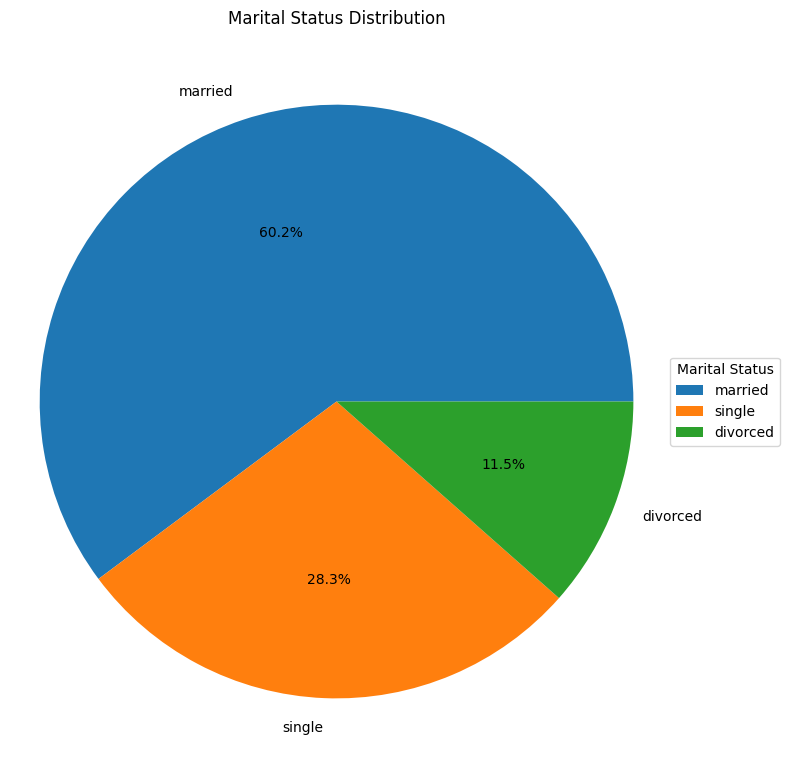

In [5]:
# Count the frequency of each category in the 'marital' column
marital_counts = df['marital'].value_counts()

# Calculate the percentage of each category
marital_percentages = marital_counts / len(df) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_percentages, labels=marital_counts.index, autopct='%1.1f%%')
plt.title("Marital Status Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Marital Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

# Reading the data
df = pd.read_csv('bank.csv', delimiter=';')

# Initialize LabelEncoder
le = LabelEncoder()

# Convert categorical variables to numeric
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

# Convert binary categorical variables to numeric
df['default'] = df['default'].map({1: 1, 0: 0})
df['housing'] = df['housing'].map({1: 1, 0: 0})
df['loan'] = df['loan'].map({1: 1, 0: 0})

# Convert the target variable to numeric
df['y'] = df['y'].map({1: 1, 0: 0})

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation coefficients for the independent variable 'Y'
correlation_coefficients = correlation_matrix['y']

# Print the correlation coefficients
print("Correlation Coefficients:")
print(correlation_coefficients)

Correlation Coefficients:
age          0.025155
job          0.040438
marital      0.045588
education    0.066241
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact     -0.148395
day         -0.028348
month       -0.024471
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome    -0.077840
y            1.000000
Name: y, dtype: float64


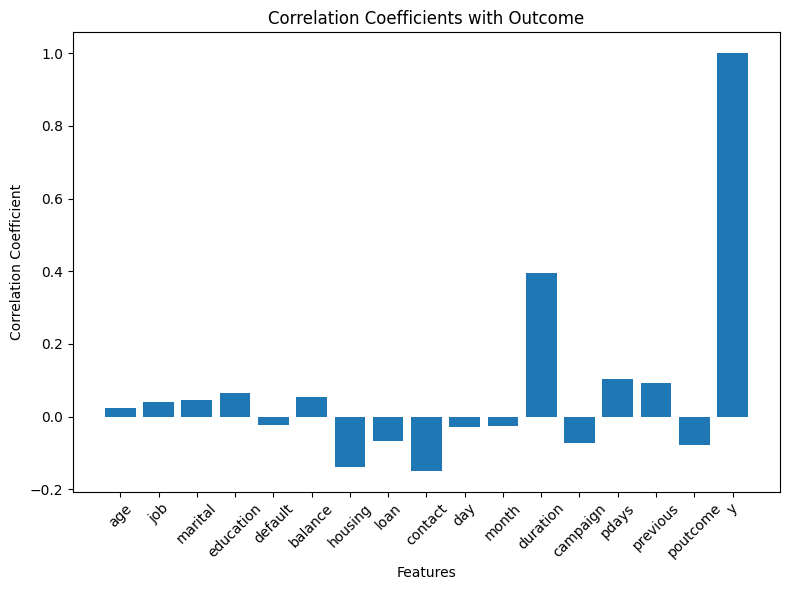

In [9]:
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(correlation_coefficients.index, correlation_coefficients.values)
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients with Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Select the independent variable 'y' and all other variables
X = df.drop('y', axis=1)
y = df['y']

# Calculate the correlation matrix
corr_matrix = X.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Check for multicollinearity
print("\nChecking for multicollinearity:")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            print(f"High correlation between {corr_matrix.columns[i]} and {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]}")

Correlation Matrix:
                age       job   marital  education   default   balance  \
age        1.000000 -0.021868 -0.403240  -0.106807 -0.017879  0.097783   
job       -0.021868  1.000000  0.062045   0.166707 -0.006853  0.018232   
marital   -0.403240  0.062045  1.000000   0.108576 -0.007023  0.002122   
education -0.106807  0.166707  0.108576   1.000000 -0.010718  0.064514   
default   -0.017879 -0.006853 -0.007023  -0.010718  1.000000 -0.066745   
balance    0.097783  0.018232  0.002122   0.064514 -0.066745  1.000000   
housing   -0.185513 -0.125363 -0.016096  -0.090790 -0.006025 -0.068768   
loan      -0.015655 -0.033004 -0.046893  -0.048574  0.077234 -0.084350   
contact    0.026221 -0.082063 -0.039201  -0.110928  0.015404 -0.027273   
day       -0.009120  0.022856 -0.005261   0.022671  0.009424  0.004503   
month     -0.042357 -0.092870 -0.006991  -0.057304  0.011486  0.019777   
duration  -0.004648  0.004744  0.011852   0.001935 -0.010021  0.021560   
campaign   0.00476

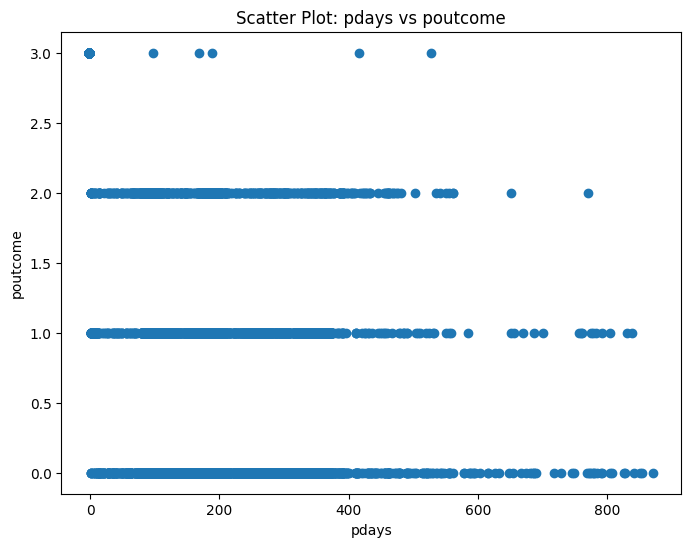

In [ ]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['pdays'], df['poutcome'])

# Add labels and title
plt.xlabel('pdays')
plt.ylabel('poutcome')
plt.title('Scatter Plot: pdays vs poutcome')

# Display the plot
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['y'])
y = df['y']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Neural Network
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

# Evaluating the models
models = [
    ('Linear Regression', lr_pred),
    ('KNN', knn_pred),
    ('SVM', svm_pred),
    ('Logistic Regression', lr_pred),
    ('Decision Trees', dt_pred),
    ('Random Forest', rf_pred),
    ('Neural Network', nn_pred)
]

for name, y_pred in models:
    print(f"\n{name}:")
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Linear Regression:
Accuracy: 0.8795753621585757
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      7952
           1       0.50      0.17      0.25      1091

    accuracy                           0.88      9043
   macro avg       0.70      0.57      0.59      9043
weighted avg       0.85      0.88      0.85      9043

Confusion Matrix:
[[7770  182]
 [ 907  184]]

KNN:
Accuracy: 0.8763684617936526
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7952
           1       0.48      0.28      0.35      1091

    accuracy                           0.88      9043
   macro avg       0.69      0.62      0.64      9043
weighted avg       0.85      0.88      0.86      9043

Confusion Matrix:
[[7620  332]
 [ 786  305]]

SVM:
Accuracy: 0.8794647793873714
Classification Report:
              precision    recall  f1-score   support

           0 

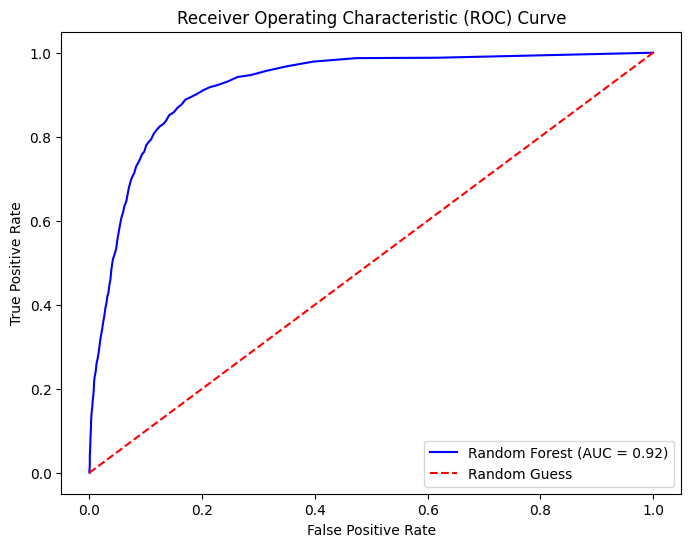

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()